In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("/content/Training.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0
2459,6,105,70,32,68,30.8,0.122,37,0


In [ ]:
df.shape

(2460, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

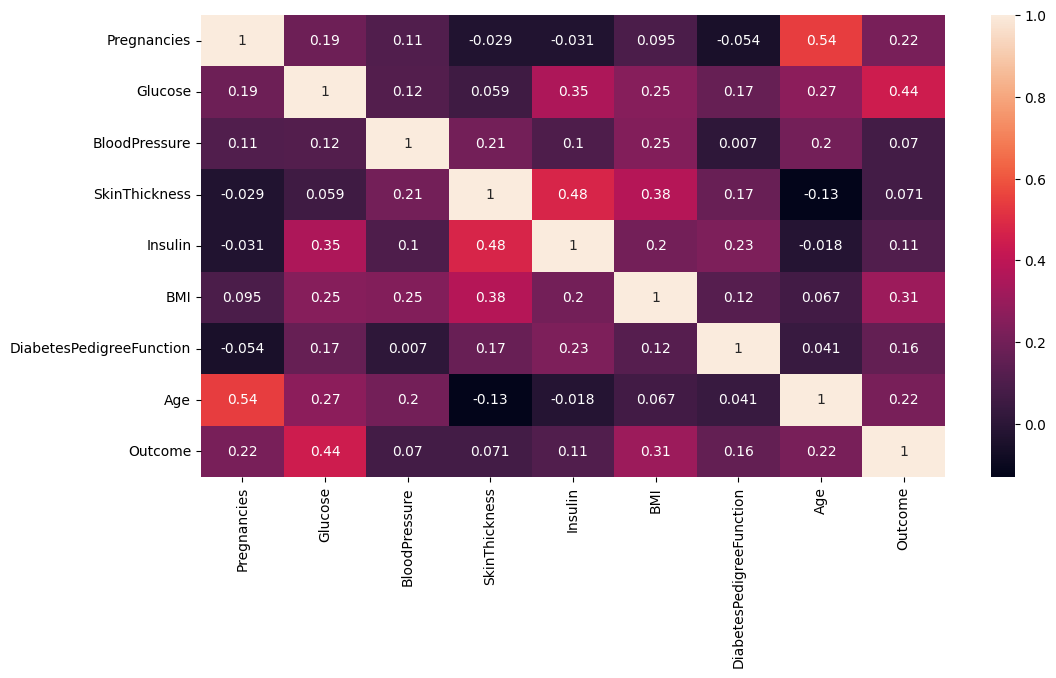

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

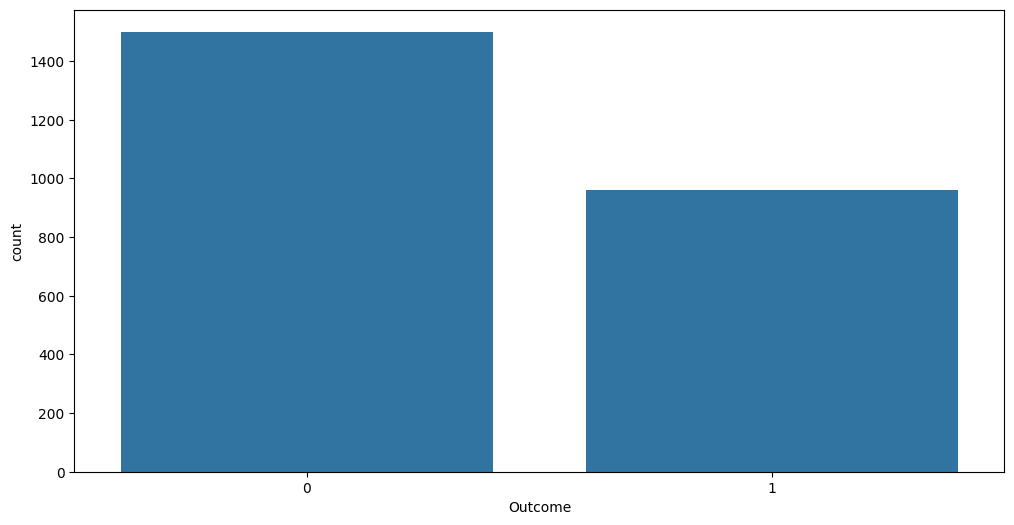

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Outcome",data=df)
plt.show()

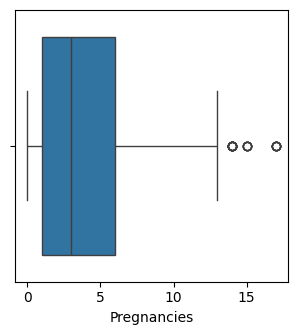

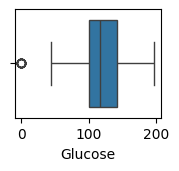

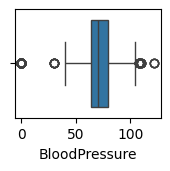

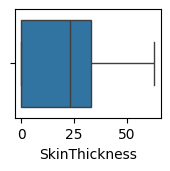

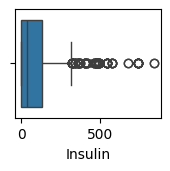

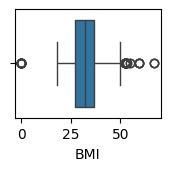

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]):
 plt.subplot(3,3,i+1)
 sns.boxplot(x=col,data=df)
 plt.show()

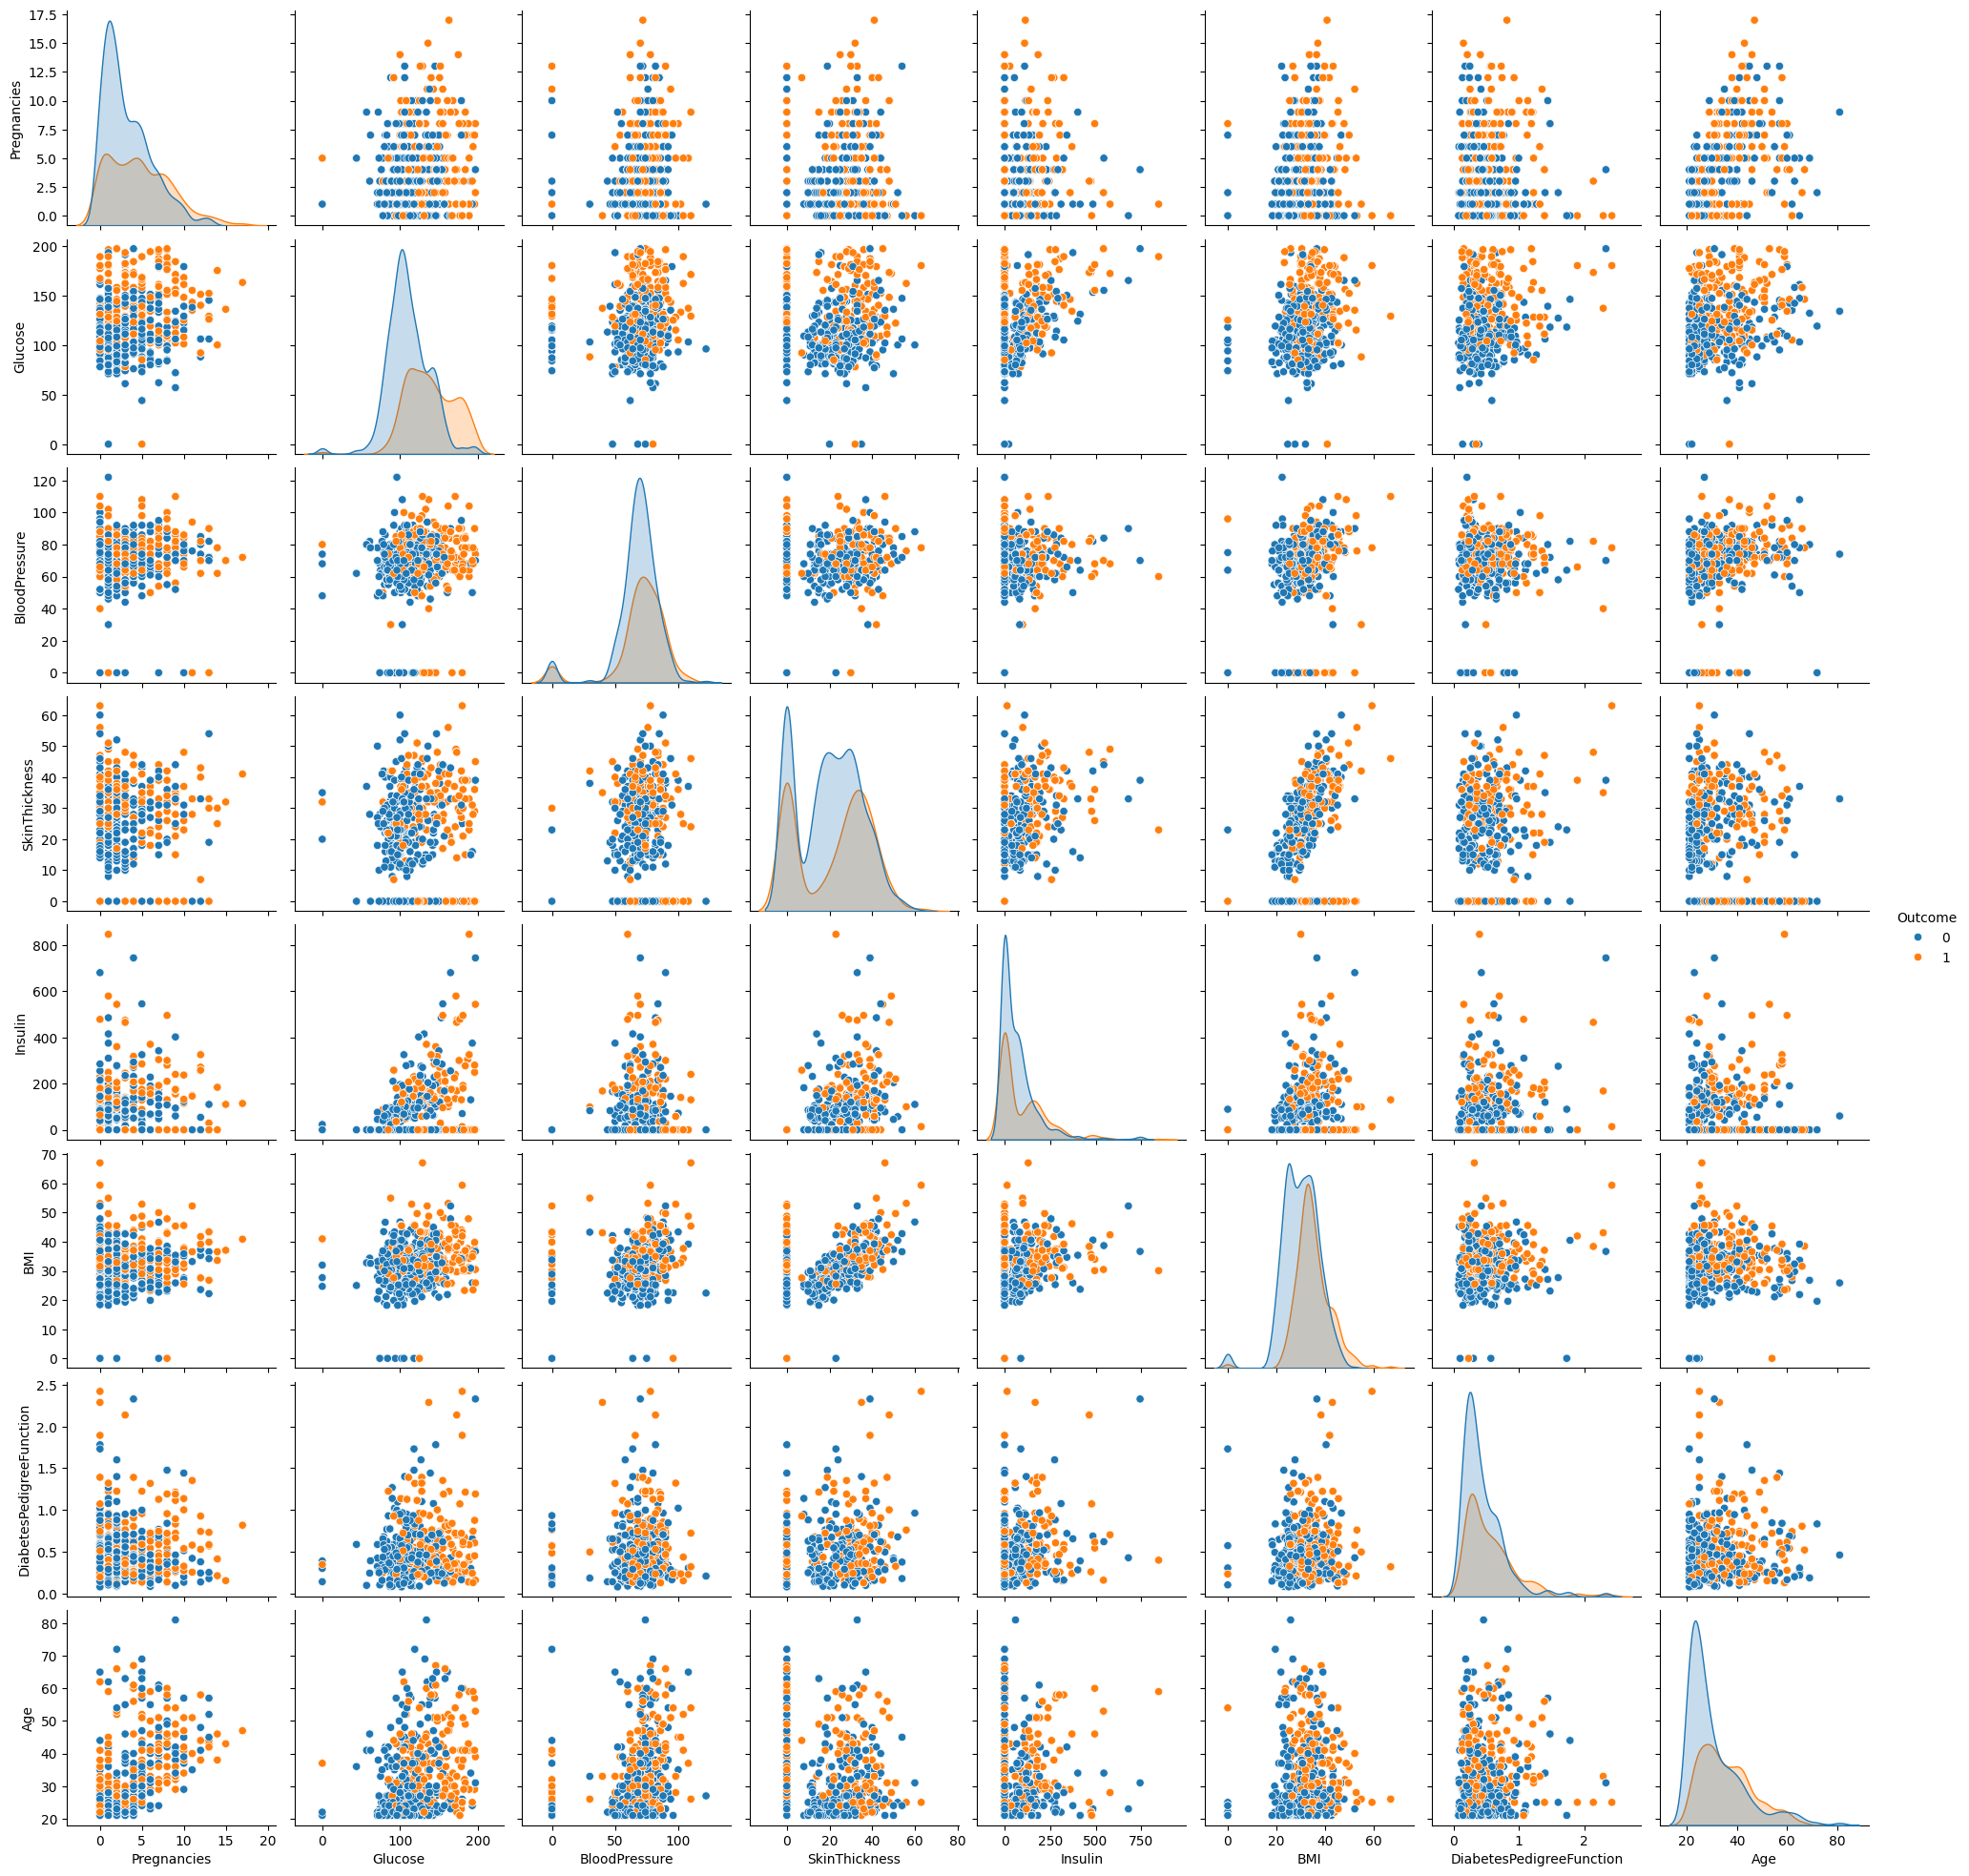

In [ ]:
sns.pairplot(df,hue="Outcome" )

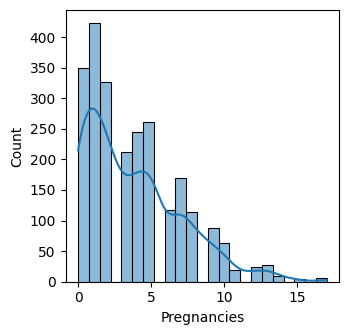

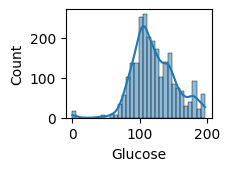

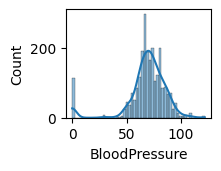

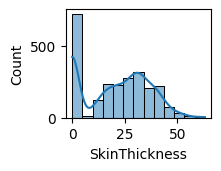

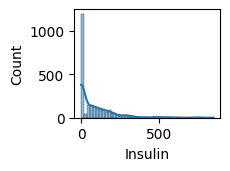

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin"]):
 plt.subplot(3,3,i+1)
 sns.histplot(x=col,data=df,kde=True)
 plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X= pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis=1),),columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age","DiabetesPedigreeFunction"])


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
0,0.662215,0.830574,0.161696,0.920769,-0.686299,0.206327,0.372579,1.527084
1,-0.854873,-1.151630,-0.152790,0.538937,-0.686299,-0.690996,-0.385991,-0.161967
2,1.269050,1.931798,-0.257618,-1.306586,-0.686299,-1.114020,0.496259,-0.073069
3,-0.854873,-1.025776,-0.152790,0.157105,0.118895,-0.498712,-0.891704,-1.050941
4,-1.158291,0.484475,-1.515561,0.920769,0.752771,1.424122,4.937739,0.015828


In [ ]:
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores=[]
train_scores=[]
for i in range(1,20):
  knn= KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_train,y_train))

In [ ]:
max_train_score=max(train_scores)
train_scores_index=[i for i,v in enumerate(train_scores)if v== max_train_score]
print("max_train_score{} % and k={}".format(max_train_score*100,list(map(lambda X: X+1,train_scores_index))))

max_train_score100.0 % and k=[1]


In [ ]:
max_test_score=max(test_scores)
test_scores_index=[i for i,v in enumerate(test_scores)if v== max_test_score]
print("max_test_score{} % and k={}".format(max_test_score*100,list(map(lambda X: X+1,test_scores_index))))

max_test_score100.0 % and k=[1]


In [ ]:
knn=KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8170731707317073

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[254,  37],
       [ 53, 148]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       291
           1       0.80      0.74      0.77       201

    accuracy                           0.82       492
   macro avg       0.81      0.80      0.81       492
weighted avg       0.82      0.82      0.82       492



In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from flask import Flask, request, render_template_string, jsonify, redirect, url_for

# --- Configuration and File Paths ---
# The model and scaler will be saved in these files after the first successful training run.
MODEL_PATH = 'knn_model.pkl'
SCALER_PATH = 'scaler.pkl'
# This path points to the data file you uploaded.
DATA_FILE = 'Training.csv'

# --- 1. Model Training and Saving Logic (Improved) ---

def train_and_save_model():
    """
    Trains the K-Nearest Neighbors (KNN) model and saves the fitted
    StandardScaler and the model using pickle.
    """
    try:
        print("Starting model training process...")
        # Load Data from the user's provided CSV file
        df = pd.read_csv(DATA_FILE, encoding='latin-1')

        # Features (X) and Target (y)
        X = df.drop("Outcome", axis=1)
        y = df["Outcome"]

        # Imputation: Replacing 0s in critical biomedical fields with the mean
        # of the column to prevent zero values from skewing the scaling/model.
        zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
        # Temporarily replace 0s with NaN for accurate mean calculation
        X[zero_cols] = X[zero_cols].replace(0, np.nan)
        # Fill NaN values with the mean of the column
        X.fillna(X.mean(), inplace=True)

        # Split Data for proper cross-validation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Feature Scaling: Fit scaler on training data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        # --- Find Optimal K using Cross-Validation (Extra Feature) ---
        best_k = 1
        best_score = 0

        # Test K from 1 to 20 to find the best performing neighbor count
        k_range = range(1, 21)
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            # Use 5-fold cross-validation on the training set
            scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

            if scores.mean() > best_score:
                best_score = scores.mean()
                best_k = k

        print(f"Optimal K found: {best_k} with average 5-fold CV score: {best_score:.4f}")

        # Final Model Training: Re-fit scaler on the *entire* dataset X for deployment
        X_scaled_full = scaler.fit_transform(X)
        final_knn = KNeighborsClassifier(n_neighbors=best_k)
        final_knn.fit(X_scaled_full, y)

        # Save Scaler and Model for persistence
        with open(SCALER_PATH, 'wb') as f:
            pickle.dump(scaler, f)

        with open(MODEL_PATH, 'wb') as f:
            pickle.dump(final_knn, f)

        print("Model and Scaler successfully trained and saved.")
        return final_knn, scaler

    except FileNotFoundError:
        print(f"ERROR: The data file '{DATA_FILE}' was not found.")
        print("Please ensure 'Training.csv' is in the same directory.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred during model training: {e}")
        return None, None

# --- 2. Load Model Artifacts ---
def load_model_artifacts():
    """Loads the pre-trained model and scaler, or trains them if not found."""
    if not os.path.exists(MODEL_PATH) or not os.path.exists(SCALER_PATH):
        print("Model artifacts not found. Training model now...")
        return train_and_save_model()

    try:
        with open(MODEL_PATH, 'rb') as f:
            model = pickle.load(f)
        with open(SCALER_PATH, 'rb') as f:
            scaler = pickle.load(f)
        print("Model and Scaler loaded successfully.")
        return model, scaler
    except Exception as e:
        print(f"Error loading model artifacts: {e}. Retraining...")
        # If loading fails, attempt to retrain to fix corrupted files
        return train_and_save_model()

# Load the model and scaler on app startup
knn_model, scaler = load_model_artifacts()

# --- 3. Flask Application Setup ---

app = Flask(__name__)

# Load the HTML content from the generated file into a string.
# In a standard Flask project, this would be placed in 'templates/index.html' and rendered via render_template('index.html').
# We are doing this to keep the solution runnable in a single environment without a complex file structure.
try:
    with open('diabetes_predictor_ui.html', 'r') as f:
        HTML_CONTENT = f.read()

    # Extract the form content and dynamically generate the input fields using a Jinja2 loop
    # This is a bit advanced but ensures the dynamic input generation is handled by Flask
    # while keeping the HTML structure clean.
    FIELDS_DEFINITION = [
        ('Pregnancies', '1. Pregnancies', 'Number of times pregnant', 'number', 'e.g., 2', '0', '17', '1'),
        ('Glucose', '2. Glucose', 'Plasma glucose concentration (mg/dL)', 'number', 'e.g., 140', '44', '200', '1'),
        ('BloodPressure', '3. Blood Pressure', 'Diastolic BP (mmHg)', 'number', 'e.g., 85', '20', '122', '1'),
        ('SkinThickness', '4. Skin Thickness', 'Triceps skin fold thickness (mm)', 'number', 'e.g., 33', '7', '99', '1'),
        ('Insulin', '5. Insulin', '2-Hour serum insulin (mu U/ml)', 'number', 'e.g., 0 (if unknown)', '0', '850', '1'),
        ('BMI', '6. BMI', 'Body mass index (kg/m²)', 'number', 'e.g., 37.4', '18.0', '70.0', '0.1'),
        ('DiabetesPedigreeFunction', '7. DPF', 'Diabetes pedigree function', 'number', 'e.g., 0.244', '0.05', '2.5', '0.001'),
        ('Age', '8. Age', 'Age in years', 'number', 'e.g., 41', '21', '85', '1')
    ]

    INPUT_FIELDS_TEMPLATE = ""
    for name, label, description, input_type, placeholder, min_val, max_val, step_val in FIELDS_DEFINITION:
        INPUT_FIELDS_TEMPLATE += f"""
            <div class="input-group relative z-0 w-full mb-2 group">
                <label for="{name}" class="block mb-1 text-sm font-medium text-gray-400 transition-all duration-300">{label}</label>
                <p class="text-xs text-gray-500 mb-2">{description} (Range: {min_val} - {max_val})</p>
                <input type="{input_type}" id="{name}" name="{name}"
                       class="input-field block py-2.5 px-3 w-full text-sm text-white bg-gray-700 border border-gray-600 rounded-lg appearance-none focus:outline-none focus:ring-0 peer"
                       placeholder="{placeholder}" required
                       min="{min_val}" max="{max_val}" step="{step_val}" />
                <p class="text-xs text-red-400 mt-1 hidden validation-message font-semibold" id="{name}-error">Value must be a valid number between {min_val} and {max_val}.</p>
            </div>
        """

    # Inject the generated input fields into the HTML content by replacing the placeholder block.
    # We use a simple regex to replace the content between the placeholder comments in the HTML.
    HTML_CONTENT = re.sub(
        r'<!-- Placeholder Inputs.*End Placeholder Inputs -->',
        INPUT_FIELDS_TEMPLATE,
        HTML_CONTENT,
        flags=re.DOTALL
    )

except FileNotFoundError:
    print("WARNING: 'diabetes_predictor_ui.html' not found. Generating minimal HTML content.")
    HTML_CONTENT = "<h1>Error: HTML template not loaded.</h1><p>Please ensure 'diabetes_predictor_ui.html' is available.</p>"
except Exception as e:
    print(f"WARNING: Error processing HTML content: {e}")
    HTML_CONTENT = f"<h1>Error processing template.</h1><p>{e}</p>"


# --- 4. Flask Routes ---

@app.route('/')
def index():
    """Renders the main prediction form by reading the content of the HTML file."""
    # Since the HTML content is loaded into HTML_CONTENT string, we render it directly.
    return render_template_string(HTML_CONTENT)

@app.route('/predict', methods=['POST'])
def predict():
    """Handles prediction requests."""
    # Check if model artifacts were loaded successfully
    if knn_model is None or scaler is None:
        return jsonify({"error": "Model initialization failed. Check server logs and ensure Training.csv exists."}), 500

    try:
        data = request.get_json()

        # Define the order of features as expected by the model
        feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                         "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

        # Extract and convert input data to numerical format
        input_data = [float(data[name]) for name in feature_names]

        # Convert input to DataFrame (important for scaler to treat columns consistently)
        input_df = pd.DataFrame([input_data], columns=feature_names)

        # Scale the input features using the loaded scaler
        scaled_input = scaler.transform(input_df)

        # Make Prediction
        prediction = knn_model.predict(scaled_input)[0]

        # Get Confidence/Probability (Extra Feature)
        # Probabilities are [Prob_Negative (0), Prob_Positive (1)]
        probabilities = knn_model.predict_proba(scaled_input)[0]
        confidence = probabilities[prediction]

        return jsonify({
            "prediction": int(prediction),
            "confidence": float(confidence)
        })

    except KeyError as e:
        return jsonify({"error": f"Missing required input parameter: {e}. Please ensure all fields are filled."}), 400
    except ValueError:
        return jsonify({"error": "Invalid data format. All inputs must be numerical and within reasonable range."}), 400
    except Exception as e:
        # Log the detailed error on the server side
        print(f"Prediction Error: {e}")
        return jsonify({"error": "An unexpected server error occurred during prediction. Please try again."}), 500

if __name__ == '__main__':
    # The application runs only if model artifacts were loaded/trained successfully
    if knn_model is not None and scaler is not None:
        print("Starting Flask application...")
        # Running the app
        app.run(host='0.0.0.0', port=5000)
    else:
        print("Application stopped due to critical model setup failure. Check logs for details.")


Model artifacts not found. Training model now...
Starting model training process...
Optimal K found: 1 with average 5-fold CV score: 0.9903
Model and Scaler successfully trained and saved.
Starting Flask application...
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
